In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os

In [2]:
def create_experiment_dict(folder_path):
    experiment_dict = {}
    
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            file_name_sections = file_name.split('_')
            unique_id = file_name_sections[-1]
            subject_id = file_name_sections[-2]
            experiment_name = '_'.join(file_name_sections[:-2])
            experiment_name = experiment_name.lower()
            
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r') as file:
                data = json.load(file)
            
            if experiment_name not in experiment_dict:
                experiment_dict[experiment_name] = {}
            
            experiment_dict[experiment_name][subject_id] = data
    
    return experiment_dict


In [4]:
path = "/home/ubuntu/portiloop-training/"
experiment_dict = create_experiment_dict(path)

Get the statistics of the Sleep Staging Performance Over the 20 subjects

In [34]:
experiment = experiment_dict['first_baseline_notrain']
accuracies = []
f1_N2 = []
f1_N3 = []
f1_wake = []
cms = []
for subject in experiment.keys():
    # print(experiment[subject]['metrics'])
    accuracies.append(experiment[subject]['metrics']['ss_metrics']['accuracy'])
    f1_N2.append(experiment[subject]['metrics']['ss_metrics']['1']['f1-score'])
    f1_N3.append(experiment[subject]['metrics']['ss_metrics']['2']['f1-score'])
    f1_wake.append(experiment[subject]['metrics']['ss_metrics']['4']['f1-score'])
    cms.append(experiment[subject]['metrics']['ss_confusion_matrix'])

In [21]:
import numpy as np
average_accuracy = np.mean(accuracies)
print(average_accuracy)
# Get the standard deviation of the accuracies
std_accuracy = np.std(accuracies)
print(std_accuracy)

0.706734328806407
0.09711451554230675


In [28]:
average_f1_n2 = np.mean(f1_N2)
print(average_f1_n2)
# Get the standard deviation of the accuracies
std_f1_n2 = np.std(f1_N2)
print(std_f1_n2)

average_f1_n3 = np.mean(f1_N3)
print(average_f1_n3)
# Get the standard deviation of the accuracies
std_f1_n3 = np.std(f1_N3)
print(std_f1_n3)


0.764797138169081
0.12199061645731106
0.3308269481436845
0.30305245267389275


In [30]:
average_f1_wake = np.mean(f1_wake)
print(average_f1_wake)
# Get the standard deviation of the accuracies
std_f1_wake = np.std(f1_wake)
print(std_f1_wake)

0.7188188376883453
0.1602445520403144


In [38]:
cms = np.array(cms)
# Sum along the first axis
cms = np.sum(cms, axis=0)

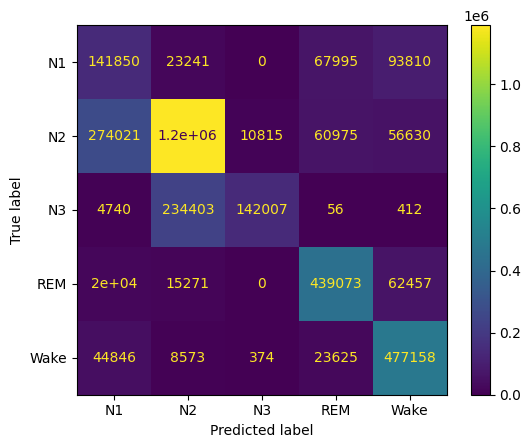

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix=cms,
                              display_labels=['N1', 'N2', 'N3', 'REM', 'Wake'])
disp.plot()

We get the baseline performace of the Spindle detection

In [49]:
experiment = experiment_dict['first_baseline_notrain']
f1_scores = []
precisions = []
recalls = []
for subject in experiment.keys():
    # print(experiment[subject]['metrics'].keys())
    f1_scores.append(experiment[subject]['metrics']['detect_spindle_metrics']['f1'])
    precisions.append(experiment[subject]['metrics']['detect_spindle_metrics']['precision'])
    recalls.append(experiment[subject]['metrics']['detect_spindle_metrics']['recall'])

In [48]:
f1_scores

[0.6363636313874723,
 0.1825242699368461,
 0.6607387090966127,
 0.062394603042451424,
 0.3599523195712232,
 0.7426981869364915,
 0.6777251137832084,
 0.6365914737069177,
 0.7226519287017553,
 0.5440414457934442,
 0.28260869143918366,
 0.4945188746272111,
 0.46805455446876476,
 0.7100859290394458,
 0.5878452989957573,
 0.5311999950682114,
 0.7277652320311279,
 0.6518340298917005,
 0.7598763262506742,
 0.5589610339640196]

Get two different models F1 score curve depending on threshold

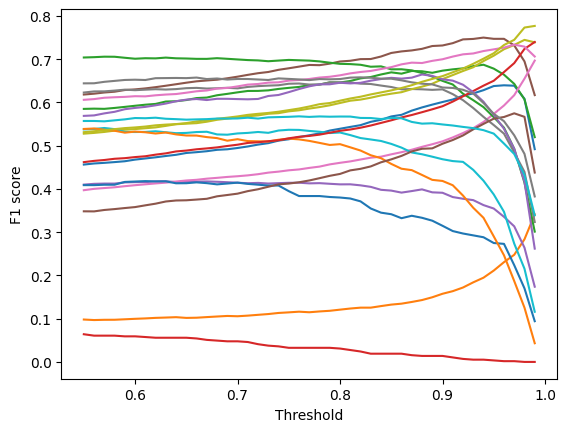

In [67]:
experiment = experiment_dict['first_baseline_notrain']

for subject in experiment.keys():
    subject_data = experiment[subject]['metrics']['multi_threshold_metrics']
    f1s = np.array(list(subject_data.values()))
    thresholds = np.array(list(subject_data.keys()), dtype=float)
    plt.plot(thresholds, f1s, label=subject)

plt.xlabel('Threshold')
plt.ylabel('F1 score')
# plt.legend()
plt.show()
# subject_1 = '01-03-0038'
# subject_2 = '01-03-0018'



In [55]:
subject_1_data

{'0.55': 0.5851917885691101,
 '0.56': 0.5857590640360718,
 '0.5700000000000001': 0.5852782719946439,
 '0.5800000000000001': 0.5873873828930648,
 '0.5900000000000001': 0.5898366561071151,
 '0.6000000000000001': 0.5924235463673827,
 '0.6100000000000001': 0.5948670898774114,
 '0.6200000000000001': 0.5966850783318114,
 '0.6300000000000001': 0.602230478710843,
 '0.6400000000000001': 0.6029066995936118,
 '0.6500000000000001': 0.6056603727670391,
 '0.6600000000000001': 0.6101856212827284,
 '0.6700000000000002': 0.611403924461718,
 '0.6800000000000002': 0.6167230499755348,
 '0.6900000000000002': 0.6199513335460435,
 '0.7000000000000002': 0.6234658765274432,
 '0.7100000000000002': 0.6266732724552263,
 '0.7200000000000002': 0.6268061736773808,
 '0.7300000000000002': 0.6280825317704992,
 '0.7400000000000002': 0.631364557380616,
 '0.7500000000000002': 0.6338461490961157,
 '0.7600000000000002': 0.6359875857218458,
 '0.7700000000000002': 0.6402088725038361,
 '0.7800000000000002': 0.6414300688148011,